# Practical Session - Genome Assembly
# Part 1

In this practical session you will:
- Construct De Brujn graphs
- Assemble a string from its k-mers using the De Bruijn graph

#### How exciting! Let's start!
>Students names: Lev Gourevitch

## String composition

Given a string Text, its k-mer composition $Composition_k(Text)$ is the collection of all k-mer substrings of $Text$ (including repeated k-mers). 

For example,  
$Composition_3(TATGGGGTGC) = ${TAT, ATG, TGG, GGG, GGG, GGT, GTG, TGC}

#### Solve the String Composition Problem.
- Input: A string **Text** and an integer **k**.
- Output: Compositionk(Text) (the k-mers can be provided in any order)

**Sample Input:**   
text = CAATCCAAC   
k = 5

**Sample Output:**   
CAATC  
AATCC  
ATCCA  
TCCAA  
CCAAC  

In [1]:
def composition(text, k):
    kmers = [text[i:i+k] for i in range(0, len(text) - k + 1)]
    return kmers

Test your code:

In [2]:
assert composition('CAATCCAAC', 5) == ['CAATC', 'AATCC', 'ATCCA', 'TCCAA', 'CCAAC']

## Create a De Bruijn graph

Given a string, split it to k-mers and construct the De Bruijn graph

#### Solve the De Bruijn Graph from a String Problem.
- Input: An integer $k$ and a string Text.
- Output: $DeBruijn_k(Text)$

**Sample Input:**   
$k=4$  
$Text=AAGATTCTCTAAGA$  

**Sample Output:**   
A graph with the following adjacency list:  
AAG -> AGA,AGA  
AGA -> GAT  
ATT -> TTC  
CTA -> TAA  
CTC -> TCT  
GAT -> ATT  
TAA -> AAG  
TCT -> CTA,CTC  
TTC -> TCT  

> **Guidence:** Create [MultiDiGraph](https://networkx.github.io/documentation/stable/reference/classes/multidigraph.html)

In [3]:
import networkx as nx
from IPython.display import Image

def draw_graph(g):
    """displays a graph"""
    d = nx.drawing.nx_pydot.to_pydot(g)

    png_str = d.create_png()
    img = Image(data=png_str)
    display(img)


In [4]:
from functools import reduce, partial


def add_needed_edge(kmer, multi_g, k):
    multi_g.add_edge(kmer[:k-1], kmer[1:])
    
def add_needed_nodes(kmer, multi_g, k):
    multi_g.add_nodes_from([kmer[:k-1], kmer[1:]])

    
def debruijn(kmers):
    multi_graph = nx.MultiDiGraph()
    
    add_needed_edge_p = partial(add_needed_edge, multi_g=multi_graph, k=len(kmers[0]))
    list(map(add_needed_edge_p, kmers))
    
    return multi_graph

Let's look at the graph you created

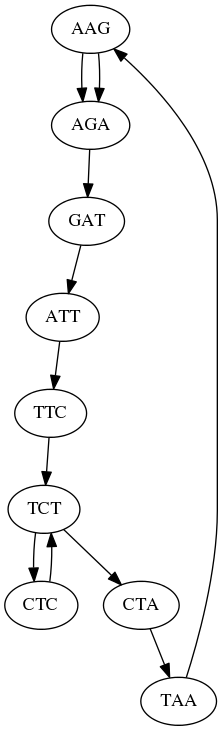

In [5]:
k = 4
text = 'AAGATTCTCTAAGA'

kmers = composition(text, k)
g = debruijn(kmers)
draw_graph(g)

## Eulerian Cycle in a De Bruijn graph

Now, suppose your graph contains an Eulerian cycle.

#### Solve the Eulerian Cycle Problem.
- Input: The adjacency list of an Eulerian directed graph.
- Output: An Eulerian cycle in this graph.

**Sample Input:**   
A graph with the edges:  
 0 -> 3  
 1 -> 0  
 2 -> 1,6  
 3 -> 2  
 4 -> 2  
 5 -> 4  
 6 -> 5,8  
 7 -> 9  
 8 -> 7  
 9 -> 6  

**Sample Output:**   
6->8->7->9->6->5->4->2->1->0->3->2  
In Python represent the cycle as a list of nodes: [6, 8, 7, 9, 6, 5, 4, 2, 1, 0, 3, 2]

> **Guidence:** You don't need to implement an algorithm to find an Euler cycle in the graph. Use [eulerian_circuit](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.euler.eulerian_circuit.html) method from NetworkX  

In [6]:
def create_graph(nodes, edges):
    graph = nx.MultiDiGraph()
    graph.add_nodes_from(nodes)
    graph.add_edges_from(edges)
    
    return graph

In [7]:
def get_euler_cycle_nodes(graph):
    """Returns a list of nodes representing an eulerian cycle"""
    
    #write your code 
    euler_edges = nx.eulerian_circuit(graph)
    return list(map(lambda e: e[0], euler_edges))

Check your code:

In [8]:
nodes = list(range(10))
edges = [(0, 3), (1, 0), (2, 1), (2, 6), (3, 2), (4, 2), (5, 4), (6, 5), (6, 8), (7, 9), (8, 7), (9, 6)]

graph = create_graph(nodes, edges)
cycle_nodes = get_euler_cycle_nodes(graph)

expected_ans = [0, 3, 2, 6, 8, 7, 9, 6, 5, 4, 2, 1]

assert len(expected_ans) == len(cycle_nodes)
assert ' '.join([str(elem) for elem in expected_ans]) in ' '.join([str(elem) for elem in cycle_nodes + cycle_nodes])

## Eulerian Path in a De Bruijn graph

Suppose your graph contains an Eulerian **path**. 

#### Solve the Eulerian Path Problem.
- Input: The adjacency list of a directed graph that has an Eulerian path.
- Output: An Eulerian path in this graph.

**Sample Input:**   
 0 -> 2  
 1 -> 3  
 2 -> 1  
 3 -> 0,4  
 5 -> 3,6  
 6 -> 7  
 7 -> 8  
 8 -> 5  

**Sample Output:**   
5->6->7->8->5->3->0->2->1->3->4

First, we will create a graph with an Eulerian **path**

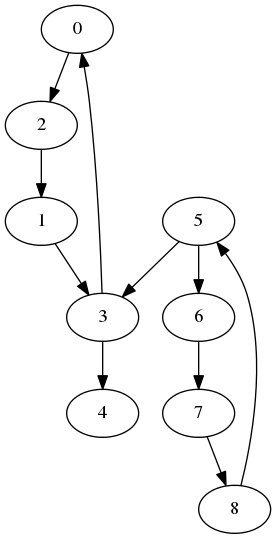

In [9]:
nodes = list(range(9))
edges = [(0, 2), (1, 3), (2, 1), (3, 0), (3, 4), (5, 3), (5, 6), (6, 7), (7, 8), (8, 5)]

graph = create_graph(nodes, edges)
draw_graph(graph)

Look at the graph, which two nodes need to be connected in order to create an Eulerian cycle?

In [10]:
def find_no_connected_nodes(graph):
    not_connected = []
    for node in graph:
        if graph.degree(node) % 2:
            not_connected.append(node)
    return not_connected


def connect_not_connected(graph, not_connected):
    first_node = not_connected[0]
    if len(list(graph.neighbors(first_node))) * 2 < graph.degree(first_node):
        graph.add_edge(not_connected[0], not_connected[1])
        return not_connected[1]
    else:
        graph.add_edge(not_connected[1], not_connected[0])
        return not_connected[0]

    
def eulerize(graph):
    """
    Adds an edge between two nodes in order to create an euler cycle
    
    Args:
        graph: a graph with an Euler path

    Returns:
        The starting node of an eulerian path
    """
    not_connected = find_no_connected_nodes(graph)
    first_node = connect_not_connected(graph, not_connected)
        
    return first_node

How does the new graph look like?

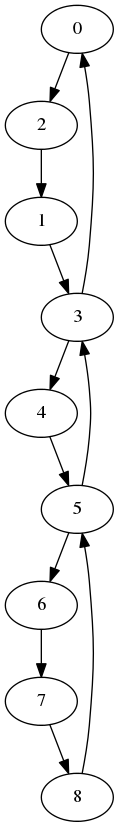

In [11]:
eulerize(graph)
draw_graph(graph)

In [12]:
def get_euler_path(graph):
    
    src_node = eulerize(graph)
    euler_edges = nx.eulerian_circuit(graph, source=src_node)
    
    return list(map(lambda e: e[0], euler_edges))

Test your code

In [13]:
nodes = list(range(9))
edges = [(0, 2), (1, 3), (2, 1), (3, 0), (3, 4), (5, 3), (5, 6), (6, 7), (7, 8), (8, 5)]

graph = create_graph(nodes, edges)
path = get_euler_path(graph)

expected_ans = [5, 6, 7, 8, 5, 3, 0, 2, 1, 3, 4]

assert expected_ans == path

## Reconstruct a string from its genome path

Suppose you extracted an Eulerian path from a Debruijn graph  
Now create a string from this path.

#### Solve the String Spelled by a Genome Path Problem.
- Input: A sequence path of k-mers $Pattern_1, … ,Pattern_n$ such that the last k - 1 symbols of $Pattern_i$ (suffix) are equal to the first k-1 symbols of $Pattern_{i+1}$ (prefix) for 1 ≤ i ≤ n-1.
- Output: A string Text of length k+n-1 such that the i-th k-mer in Text is equal to $Pattern_i$ (for 1 ≤ i ≤ n).

**Sample Input:**   
ACCGA  
CCGAA  
CGAAG  
GAAGC  
AAGCT  

**Sample Output:**   
ACCGAAGCT

In [14]:
def path_to_genome(kmers):
    g = debruijn(kmers)
    euler_path = get_euler_path(g)
    txt = reduce(lambda acc, node: acc + node[-1], euler_path[1:], euler_path[0])
    return txt       

In [15]:
nodes = ['ACCGA',
        'CCGAA',
        'CGAAG',
        'GAAGC',
        'AAGCT']

assert path_to_genome(nodes) == 'ACCGAAGCT'

## Genome Assembly

You are ready to assembale a genome!  
Reconstruct the original string given the k-mers

The solution relies on three problems that we have already solved:

1. The de Bruijn Graph Construction Problem;
3. The Eulerian Path Problem;
3. The String Spelled by a Genome Path Problem.

#### Solve the String Reconstruction Problem.
- Input: A list of k-mers $Patterns$
- Output: A string $Text$ with k-mer composition equal to Patterns. (If multiple answers exist, you may return any one.)

**Sample Input:**   
CTTA  
ACCA  
TACC  
GGCT  
GCTT  
TTAC  

**Sample Output:**   
GGCTTACCA

In [16]:
def string_reconstruction(patterns):
    text = path_to_genome(patterns)
    return text

Test your code

In [17]:
patterns = ['CTTA', 'ACCA', 'TACC', 'GGCT', 'GCTT', 'TTAC']

assert string_reconstruction(patterns) == 'GGCTTACCA'

## Submission

Don't forget to submit this file in the [Submission System](https://cs-serv.cs.bgu.ac.il/cs_service/subsys.html)

If you didn't finish, submit your progress and submit the completed assignment until the 1/4/2019

Your will get a full score if you finish the assignment.